In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("D:/AI Trends/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
#Split the dataset into labels and target variable
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [8]:
#Split data into training amd testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.2)


In [10]:
features_to_scale = ["Pregnancies", "Glucose", "BloodPressure","SkinThickness", "Insulin",
                     "BMI", "DiabetesPedigreeFunction", "Age"]

In [11]:
scaler = StandardScaler()
scaler.fit(X_train[features_to_scale]) #Fit on all specified features

StandardScaler()

In [12]:
X_train[features_to_scale] =scaler.transform(X_train[features_to_scale])
X_test[features_to_scale] =scaler.transform(X_test[features_to_scale])

In [13]:
#Perform logistic regression (classification)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_test_pred = model.predict(X_test)

In [16]:
comparison = pd.DataFrame({"actual": y_test, "predicted": y_test_pred})

In [17]:
print(comparison[0:15])
print(comparison[100:])

     actual  predicted
313       0          0
99        1          0
550       0          0
334       0          0
211       0          1
704       0          0
255       1          0
619       1          0
345       0          1
718       0          0
33        0          0
210       0          0
667       1          0
724       0          0
505       0          0
     actual  predicted
42        0          0
471       0          0
367       0          0
238       1          1
439       0          0
360       1          1
100       1          1
456       0          0
16        1          0
526       0          0
269       1          1
720       0          0
335       0          1
584       1          0
627       0          0
125       1          0
459       0          1
9         1          0
316       0          0
137       0          0
288       0          0
105       0          0
142       0          0
714       0          0
104       0          0
494       0          0
525       0

In [18]:
accuracy = accuracy_score(y_test, y_test_pred)

In [19]:
print(accuracy)

0.7402597402597403


In [22]:
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

[[87 11]
 [29 27]]


In [24]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        98
           1       0.71      0.48      0.57        56

    accuracy                           0.74       154
   macro avg       0.73      0.68      0.69       154
weighted avg       0.74      0.74      0.73       154



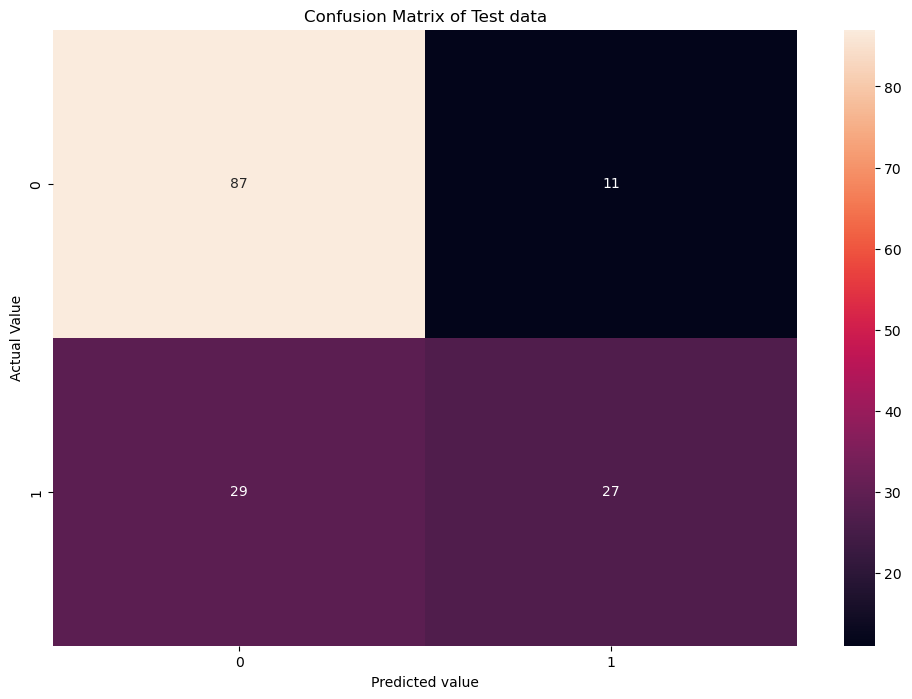

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion, annot=True, fmt='d')
plt.title('Confusion Matrix of Test data')
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')
plt.show();

In [28]:
TN = confusion[0][0]
TP = confusion[1][1]
FP = confusion[0][1]
FN = confusion[1][0]

In [29]:
recall = TP/(TP+FN)
print(recall)

0.48214285714285715


In [30]:
precision = TP/(TP+FP)
print(precision)

0.7105263157894737


In [32]:
specificity = TN/(TN+FP)
print(specificity)

0.8877551020408163


In [33]:
accuracy = (TP+TN)/(TP+FP+TN+FN)
print(accuracy)

0.7402597402597403


In [34]:
#Make new prediction

print("*** MAking new predicitions on new data *****")

new_data = np.array([
    [9, 160, 70, 20 , 80 , 28, 0.5, 34], 
    [0, 104, 70, 15, 0, 21, 0.5, 29],
    [2, 158, 90, 0, 0, 31.6, 1.072, 66],
    [1, 100, 66, 56, 15, 23.6, 0.666, 26]
])

*** MAking new predicitions on new data *****


In [35]:
new_data_df = pd.DataFrame(data= new_data, columns = X_train.columns)

In [36]:
new_data_df = new_data_df.fillna(0)
print(new_data_df)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          9.0    160.0           70.0           20.0     80.0  28.0   
1          0.0    104.0           70.0           15.0      0.0  21.0   
2          2.0    158.0           90.0            0.0      0.0  31.6   
3          1.0    100.0           66.0           56.0     15.0  23.6   

   DiabetesPedigreeFunction   Age  
0                     0.500  34.0  
1                     0.500  29.0  
2                     1.072  66.0  
3                     0.666  26.0  


In [37]:
new_data_scaled = scaler.transform(new_data_df)
print(new_data_scaled)

[[ 1.49582975  1.18070302  0.04205469 -0.04417102 -0.01716785 -0.53652528
   0.08228487  0.07219916]
 [-1.14167988 -0.5497131   0.04205469 -0.3632417  -0.69888536 -1.44776596
   0.08228487 -0.35819194]
 [-0.55556663  1.11890244  1.10686199 -1.32045374 -0.69888536 -0.06788722
   1.76432353  2.82670221]
 [-0.84862326 -0.67331425 -0.17090678  2.25313787 -0.57106333 -1.10930513
   0.57042896 -0.6164266 ]]


In [38]:
column_names = ["Pregnancies", "Glucose", "BloodPressure","SkinThickness", "Insulin",
                     "BMI", "DiabetesPedigreeFunction", "Age"]

In [39]:
predict_df = pd.DataFrame(new_data_scaled, columns = column_names)

In [40]:
print(predict_df)

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     1.495830  1.180703       0.042055      -0.044171 -0.017168 -0.536525   
1    -1.141680 -0.549713       0.042055      -0.363242 -0.698885 -1.447766   
2    -0.555567  1.118902       1.106862      -1.320454 -0.698885 -0.067887   
3    -0.848623 -0.673314      -0.170907       2.253138 -0.571063 -1.109305   

   DiabetesPedigreeFunction       Age  
0                  0.082285  0.072199  
1                  0.082285 -0.358192  
2                  1.764324  2.826702  
3                  0.570429 -0.616427  


In [41]:
prediction = model.predict(predict_df)
print(prediction)

[1 0 1 0]


In [42]:
# Saving Model

import joblib

joblib.dump(model, 'final_diabetes_model.pkl')
joblib.dump(list(X.columns), 'diabetes_column_names.pkl')

['diabetes_column_names.pkl']

In [43]:
#Loading model
col_names = joblib.load('diabetes_column_names.pkl')
loaded_model = joblib.load('final_diabetes_model.pkl')

In [44]:
#Make new prediction using the loaded model

print("*** MAking new predicitions on new data *****")

new_data = np.array([
    [12,200, 99, 18, 90 , 30 , 0.7, 44], 
    [0,82,71,16,0,19,0.1,27],
])

*** MAking new predicitions on new data *****


In [45]:
new_data_df = pd.DataFrame(data=new_data, columns = X_train.columns)

In [46]:
new_data_df = new_data_df.fillna(0)
print(new_data_df)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         12.0    200.0           99.0           18.0     90.0  30.0   
1          0.0     82.0           71.0           16.0      0.0  19.0   

   DiabetesPedigreeFunction   Age  
0                       0.7  44.0  
1                       0.1  27.0  


In [47]:
new_data_scaled = scaler.transform(new_data_df)
print(new_data_scaled)

[[ 2.37499962  2.41671453  1.58602528 -0.17179929  0.06804684 -0.2761708
   0.67041028  0.93298136]
 [-1.14167988 -1.22951943  0.09529505 -0.29942757 -0.69888536 -1.70812044
  -1.09396593 -0.53034838]]


In [48]:
predict_df = pd.DataFrame(new_data_scaled, columns = column_names)
print(predict_df)

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0      2.37500  2.416715       1.586025      -0.171799  0.068047 -0.276171   
1     -1.14168 -1.229519       0.095295      -0.299428 -0.698885 -1.708120   

   DiabetesPedigreeFunction       Age  
0                  0.670410  0.932981  
1                 -1.093966 -0.530348  


In [49]:
prediction = loaded_model.predict(predict_df)
print(prediction)

[1 0]
